In [1]:
import IJulia

# The julia kernel has built in support for Revise.jl, so this is the 
# recommended approach for long-running sessions:
# https://github.com/JuliaLang/IJulia.jl/blob/9b10fa9b879574bbf720f5285029e07758e50a5e/src/kernel.jl#L46-L51

# Users should enable revise within .julia/config/startup_ijulia.jl:
# https://timholy.github.io/Revise.jl/stable/config/#Using-Revise-automatically-within-Jupyter/IJulia-1

# clear console history
IJulia.clear_history()

fig_width = 7
fig_height = 5
fig_format = :retina
fig_dpi = 96

# no retina format type, use svg for high quality type/marks
if fig_format == :retina
  fig_format = :svg
elseif fig_format == :pdf
  fig_dpi = 96
  # Enable PDF support for IJulia
  IJulia.register_mime(MIME("application/pdf"))
end

# convert inches to pixels
fig_width = fig_width * fig_dpi
fig_height = fig_height * fig_dpi

# Intialize Plots w/ default fig width/height
try
  import Plots

  # Plots.jl doesn't support PDF output for versions < 1.28.1
  # so use png (if the DPI remains the default of 300 then set to 96)
  if (Plots._current_plots_version < v"1.28.1") & (fig_format == :pdf)
    Plots.gr(size=(fig_width, fig_height), fmt = :png, dpi = fig_dpi)
  else
    Plots.gr(size=(fig_width, fig_height), fmt = fig_format, dpi = fig_dpi)
  end
catch e
  # @warn "Plots init" exception=(e, catch_backtrace())
end

# Initialize CairoMakie with default fig width/height
try
  import CairoMakie

  # CairoMakie's display() in PDF format opens an interactive window
  # instead of saving to the ipynb file, so we don't do that.
  # https://github.com/quarto-dev/quarto-cli/issues/7548
  if fig_format == :pdf
    CairoMakie.activate!(type = "png")
  else
    CairoMakie.activate!(type = string(fig_format))
  end
  CairoMakie.update_theme!(resolution=(fig_width, fig_height))
catch e
    # @warn "CairoMakie init" exception=(e, catch_backtrace())
end
  
# Set run_path if specified
try
  run_path = raw"/Users/mpf/.julia/dev/KLLS"
  if !isempty(run_path)
    cd(run_path)
  end
catch e
  @warn "Run path init:" exception=(e, catch_backtrace())
end


# emulate old Pkg.installed beahvior, see
# https://discourse.julialang.org/t/how-to-use-pkg-dependencies-instead-of-pkg-installed/36416/9
import Pkg
function isinstalled(pkg::String)
  any(x -> x.name == pkg && x.is_direct_dep, values(Pkg.dependencies()))
end

# ojs_define
if isinstalled("JSON") && isinstalled("DataFrames")
  import JSON, DataFrames
  global function ojs_define(; kwargs...)
    convert(x) = x
    convert(x::DataFrames.AbstractDataFrame) = Tables.rows(x)
    content = Dict("contents" => [Dict("name" => k, "value" => convert(v)) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
elseif isinstalled("JSON")
  import JSON
  global function ojs_define(; kwargs...)
    content = Dict("contents" => [Dict("name" => k, "value" => v) for (k, v) in kwargs])
    tag = "<script type='ojs-define'>$(JSON.json(content))</script>"
    IJulia.display(MIME("text/html"), tag)
  end
else
  global function ojs_define(; kwargs...)
    @warn "JSON package not available. Please install the JSON.jl package to use ojs_define."
  end
end


# don't return kernel dependencies (b/c Revise should take care of dependencies)
nothing


In [2]:
using Plots, KLLS

In [3]:
m, n = 200, 300
q = fill(1/n, n)
A = randn(m, n)
b = A*q + 0.1*randn(m)
λ = 1e-2

0.01

In [4]:
p, y, trace = newton_opt(A, b, q, λ)

iter:         obj       |grd| line its
   0: -3.5397e-15  1.3503e+00        0
   1: -2.2701e+00  4.0401e+00        1
   2: -2.4485e+00  8.2156e+00        1


   3: -2.6168e+00  1.3146e+01        7
   4: -9.3681e+00  1.2635e+01        8


   5: -1.3054e+01  8.8760e+00        7
   6: -1.4563e+01  7.2922e+00        5
   7: -1.4609e+01  8.2790e+00        2
   8: -1.5020e+01  6.1940e+00        3
   9: -1.5384e+01  7.9910e+00        5
  10: -1.5832e+01  7.9817e+00        4
  11: -1.6341e+01  3.4968e+00        3
  12: -1.7676e+01  1.7067e+00        4
  13: -1.7921e+01  1.2500e+00        1
  14: -1.8180e+01  3.2543e-01        1
  15: -1.8207e+01  3.2071e-02        1
  16: -1.8207e+01  2.9882e-04        1
  17: -1.8207e+01  5.0051e-08        1


([3.9209000120467e-49, 0.0026613310314550827, 8.335093722737119e-21, 0.00959320127632835, 0.004954611830304757, 9.873108657985941e-8, 1.13585823599059e-59, 0.007984644593247606, 0.008556350110673044, 0.007187077962012812  …  0.00241305329060217, 0.00640266446254568, 0.008549695965348882, 3.925051875456114e-10, 0.0007475014558376317, 8.410705586406562e-23, 5.045131251374906e-12, 0.0068536460378894075, 0.010548188608584226, 0.005870447466414323], [-5.150933098072012, 5.947783262748291, -6.247287723099077, 1.3745668401297253, -0.16075572291530707, -4.512543473675008, -1.4920867158651332, 3.398043622994452, 2.561540353733179, -5.19631821658439  …  -2.045553512932791, 1.2081326295420594, 0.28947105571546317, 1.845047717258881, 3.0747692704579217, 0.228550253436505, -3.2384101468461135, 0.9841375346521, -2.760721934199368, -5.9968682400008415], Tracer([0.2329481886712546, 0.7582187988111441, 1.6745225645181538, 3.099400333932025, 2.7206250596717365, 2.0194451360879495, 1.728346617836565, 2.1

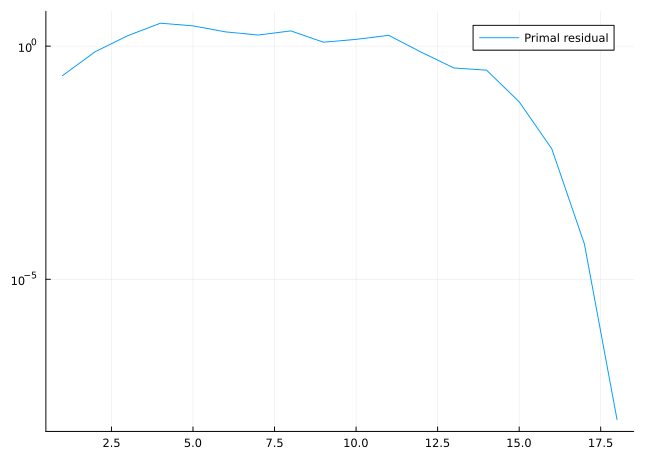

In [5]:
plot(trace.pResid, yscale=:log10, label="Primal residual")